In [ ]:
import shutil
import os

# Hapus direktori ./results jika ada
results_dir = './results'
if os.path.exists(results_dir):
    shutil.rmtree(results_dir)
    print(f'Direktori {results_dir} telah dihapus.')
else:
    print(f'Direktori {results_dir} tidak ditemukan.')

Direktori ./results tidak ditemukan.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Mengecek versi Python dan environment
print("Versi Python:")
!python --version
print("\n" + "="*50)

# Mengecek spesifikasi CPU
print("Spesifikasi CPU:")
!cat /proc/cpuinfo | grep "model name" | uniq
print("\nJumlah Core CPU:")
!nproc --all
print("\n" + "="*50)

# Mengecek GPU (jika tersedia)
print("Spesifikasi GPU:")
!nvidia-smi || echo "GPU tidak terdeteksi atau tidak tersedia."
print("\n" + "="*50)

# Mengecek total dan penggunaan RAM
print("Informasi RAM:")
!free -h
print("\n" + "="*50)

# Mengecek kapasitas disk yang tersedia
print("Informasi Disk:")
!df -h
print("\n" + "="*50)



Versi Python:
Python 3.10.12

Spesifikasi CPU:
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz

Jumlah Core CPU:
12

Spesifikasi GPU:
Mon Jan  6 09:12:11 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              46W / 400W |      2MiB / 40960MiB |      0%      Default |
|                           

# **SONET TAPI MENGGUNAKAN SMOTE INGAT BAHKAN HYPERPARAMETER BERBEDA DENGAN CHATGPT**

In [ ]:
import pandas as pd
import sentencepiece as spm
import random
import numpy as np
import torch
import transformers
import gc


print("Numpy version:", np.__version__)
print("Torch version:", torch.__version__)
print("Transformers version:", transformers.__version__)
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

torch.cuda.empty_cache()
gc.collect()

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Set the seed
set_seed(42)

Numpy version: 1.26.4
Torch version: 2.5.1+cu121
Transformers version: 4.47.1


In [ ]:
import sqlite3
#DATASET CSV
# df_test = pd.read_csv("/content/drive/MyDrive/CODING COLLAB PRO/Star Wars Episode VII - The Force Awakens 2015 (1).csv")

#DATASET BARU DB
conn = sqlite3.connect(r'/content/drive/MyDrive/CODING COLLAB PRO/IMDB_Movies_2021.db')
conn
# Display the first few rows of the testing dataset
query = 'SELECT AUTHOR,TITLE,REVIEW,RATING FROM REVIEWS'
df_test = pd.read_sql_query(query,conn)
df_test



,AUTHOR,TITLE,REVIEW,RATING
0,margarida-44311,Not Bad\n,I don't get all the terrible reviews for this ...,5.0
1,joemay-2,What are all the bad reviews about is it a wo...,I cannot believe anyone could give this film l...,8.0
2,nebk,Great White=Jaws Lite\n,Great White is not the worst way to spend 90 m...,4.0
3,kuarinofu,Bare-bones killer shark film\n,Great White is as basic of a killer shark film...,4.0
4,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n","Terrible story, dialogue and CGI. The film has...",4.0
...,...,...,...,...
5445,suryajijvania,More Parts\n,"It's master piece by Zack please part 2,3,4 al...",10.0
5446,shishirkmr-82243,It's a fantastic movie\n,No words to describe. It's awesome. One of the...,10.0
5447,moizsyed-07601,Awesome out standing!\n,Far better than previous one and better editin...,10.0
5448,samun_shrestha,EPIC\n,Why did the studio say no to this masterpiece?...,10.0


In [ ]:
import pandas as pd
import sqlite3

df_test.to_csv('output.csv', index=False)

In [ ]:
df_test = df_test.rename(columns={'REVIEW': 'review', 'RATING': 'rating'})

# Tampilkan DataFrame untuk memastikan perubahan
df_test

,AUTHOR,TITLE,review,rating
0,margarida-44311,Not Bad\n,I don't get all the terrible reviews for this ...,5.0
1,joemay-2,What are all the bad reviews about is it a wo...,I cannot believe anyone could give this film l...,8.0
2,nebk,Great White=Jaws Lite\n,Great White is not the worst way to spend 90 m...,4.0
3,kuarinofu,Bare-bones killer shark film\n,Great White is as basic of a killer shark film...,4.0
4,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n","Terrible story, dialogue and CGI. The film has...",4.0
...,...,...,...,...
5445,suryajijvania,More Parts\n,"It's master piece by Zack please part 2,3,4 al...",10.0
5446,shishirkmr-82243,It's a fantastic movie\n,No words to describe. It's awesome. One of the...,10.0
5447,moizsyed-07601,Awesome out standing!\n,Far better than previous one and better editin...,10.0
5448,samun_shrestha,EPIC\n,Why did the studio say no to this masterpiece?...,10.0


In [ ]:
import pandas as pd
import numpy as np

# Cek apakah ada kolom null di df_test
null_columns = df_test.isnull().sum()

# Ubah nilai 'Null' menjadi NaN menggunakan .loc
df_test.loc[df_test['rating'] == 'Null', 'rating'] = np.nan

# Hapus baris yang mengandung nilai NaN
df_test.dropna(inplace=True)

# Cek kembali apakah sudah tidak ada nilai null
null_columns_after = df_test.isnull().sum()
print("Jumlah nilai null per kolom setelah dihapus:")
print(null_columns_after)

# Pastikan kolom 'rating' bertipe integer
df_test['rating'] = df_test['rating'].astype(int)

# Definisikan fungsi mapping yang benar
def sentiment_target(value):
    if value in [8, 9,10]:
        return 2  # positive
    elif value in [4,5, 6,7]:
        return 0  # Neutral
    elif value in [1,2, 3]:
        return 1  # negative

# Terapkan fungsi mapping ke kolom 'rating' dan simpan hasilnya di kolom 'sentiment_label'
df_test['sentiment_label'] = df_test['rating'].map(sentiment_target)

# Outputkan beberapa baris untuk memastikan hasil mapping
df_test

Jumlah nilai null per kolom setelah dihapus:
AUTHOR    0
TITLE     0
review    0
rating    0
dtype: int64


,AUTHOR,TITLE,review,rating,sentiment_label
0,margarida-44311,Not Bad\n,I don't get all the terrible reviews for this ...,5,0
1,joemay-2,What are all the bad reviews about is it a wo...,I cannot believe anyone could give this film l...,8,2
2,nebk,Great White=Jaws Lite\n,Great White is not the worst way to spend 90 m...,4,0
3,kuarinofu,Bare-bones killer shark film\n,Great White is as basic of a killer shark film...,4,0
4,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n","Terrible story, dialogue and CGI. The film has...",4,0
...,...,...,...,...,...
5445,suryajijvania,More Parts\n,"It's master piece by Zack please part 2,3,4 al...",10,2
5446,shishirkmr-82243,It's a fantastic movie\n,No words to describe. It's awesome. One of the...,10,2
5447,moizsyed-07601,Awesome out standing!\n,Far better than previous one and better editin...,10,2
5448,samun_shrestha,EPIC\n,Why did the studio say no to this masterpiece?...,10,2


In [ ]:
# Ambil 20% sampel acak dari df_test
df_training = df_test[['review', 'sentiment_label']].sample(frac=0.85, random_state=42)

# Buat DataFrame baru df_training dengan kolom 'Review' dan 'sentiment_label'
df_training = pd.DataFrame({
    'Review': df_training['review'],
    'sentiment_label': df_training['sentiment_label']
})

# Hapus sampel yang sudah diambil dari df_test
df_test = df_test.drop(df_training.index)

# Tampilkan beberapa baris dari df_training dan df_test untuk verifikasi

print("\nDataframe Testing (Setelah Pengurangan):")
df_test



Dataframe Testing (Setelah Pengurangan):


,AUTHOR,TITLE,review,rating,sentiment_label
3,kuarinofu,Bare-bones killer shark film\n,Great White is as basic of a killer shark film...,4,0
4,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n","Terrible story, dialogue and CGI. The film has...",4,0
5,NickyDee07938,A decent effort\n,Whilst the 'shark survival' sub genre has plen...,6,0
9,rotini-52586,Liked it !\n,Thought it was a great Shark Movie . Special e...,7,0
16,gsyfrafjrp,Waste of time and money!\n,"Totally waste of time and money, worst movie t...",1,1
...,...,...,...,...,...
5431,aminussh,"Incredible, far better than previous cut\n",Zack snyder's justice league is far better tha...,9,2
5432,delpierokavinda,Great art\n,"The story of ""Man of Steel"" and ""Batman vs. Su...",10,2
5440,cjosty,RESTORE THE SNYDER VERSE\n,Zack Snyder's Justice League is an EPIC in eve...,10,2
5442,Pyro_Pizza,"Long, but worth it.\n",Zack Snyder's Justice league is an excellent m...,8,2


iNI STEMMING DILAKUKAN TANPA DILAKUKAN LOWERCASING, KARENA KADANG DEFAULTNYA STEMMING MELAKUKAN LOWERCASING SECARA OTOMATIS

In [ ]:
%pip install emoji
import nltk
import re
import emoji
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Mengunduh resource NLTK yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')

# Inisialisasi objek untuk stopwords
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # 1. Normalisasi teks: Ubah menjadi huruf kecil
    text = text.lower()

    # 2. Menghapus kata 'br' dan '</br>'
    text = re.sub(r'\bbr\b|</?br>', '', text)

    # 3. (Menghapus tahun dibatalkan sesuai modifikasi sebelumnya)

    # 4. Menghapus tanda baca kecuali tanda seru (!) dan tanda tanya (?)
    text = re.sub(r'[^\w\s!?]', '', text)

    # 5. (Langkah penghapusan karakter acak dihapus karena sudah ditangani di langkah 4)

    # 6. Mengubah emoji menjadi teks
    text = emoji.demojize(text)

    # 7. Menghapus karakter khusus (opsional, jika ada)
    text = re.sub(r'\s+', ' ', text)  # Mengganti beberapa spasi dengan satu spasi

    # 8. Menghapus stopwords kecuali yang penting untuk sentimen seperti "not", "isn't", "no"
    tokens = [word for word in text.split() if word not in stop_words or word in ["not", "isn't", "no"]]

    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Gabungkan kembali token yang sudah diproses menjadi satu kalimat
    return " ".join(stemmed_tokens)

# Preprocess dataset
df_training['cleaned_review_train'] = df_training['Review'].apply(preprocess_text)
df_test['cleaned_review_test'] = df_test['review'].apply(preprocess_text)

# Tampilkan beberapa baris pertama dari dataset testing setelah preprocessing
print(df_test[['review', 'cleaned_review_test']].head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 34.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                               review  \
3   Great White is as basic of a killer shark film...   
4   Terrible story, dialogue and CGI. The film has...   
5   Whilst the 'shark survival' sub genre has plen...   
9   Thought it was a great Shark Movie . Special e...   
16  Totally waste of time and money, worst movie t...   

                                  cleaned_review_test  
3   great white basic killer shark film possibl ev...  
4   terribl stori dialogu cgi film predict outcom ...  
5   whilst shark surviv sub genr plenti contributo...  
9   thought great shark movi special effect decent...  
16      total wast time money worst movi start summer  


In [ ]:
df_test

,AUTHOR,TITLE,review,rating,sentiment_label,cleaned_review_test
3,kuarinofu,Bare-bones killer shark film\n,Great White is as basic of a killer shark film...,4,0,great white basic killer shark film possibl ev...
4,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n","Terrible story, dialogue and CGI. The film has...",4,0,terribl stori dialogu cgi film predict outcom ...
5,NickyDee07938,A decent effort\n,Whilst the 'shark survival' sub genre has plen...,6,0,whilst shark surviv sub genr plenti contributo...
9,rotini-52586,Liked it !\n,Thought it was a great Shark Movie . Special e...,7,0,thought great shark movi special effect decent...
16,gsyfrafjrp,Waste of time and money!\n,"Totally waste of time and money, worst movie t...",1,1,total wast time money worst movi start summer
...,...,...,...,...,...,...
5431,aminussh,"Incredible, far better than previous cut\n",Zack snyder's justice league is far better tha...,9,2,zack snyder justic leagu far better theatric c...
5432,delpierokavinda,Great art\n,"The story of ""Man of Steel"" and ""Batman vs. Su...",10,2,stori man steel batman vs superman continu mov...
5440,cjosty,RESTORE THE SNYDER VERSE\n,Zack Snyder's Justice League is an EPIC in eve...,10,2,zack snyder justic leagu epic everi sens word ...
5442,Pyro_Pizza,"Long, but worth it.\n",Zack Snyder's Justice league is an excellent m...,8,2,zack snyder justic leagu excel movi howev 4 ho...


In [ ]:
df_training

,Review,sentiment_label,cleaned_review_train
1212,Malcolm & Marie gives the opportunity to two y...,2,malcolm mari give opportun two young actor shi...
5105,What has become of you Nicolas?? You used to b...,1,becom nicolas?? use awesom movi your fight ani...
4676,"Why? Seriously, why? Does she have something o...",1,why? serious why? someth someon important? kno...
1352,We need more movies with the same message.\nUn...,1,need movi messag unfortun assum audienc dumb e...
172,The only this i can say that this is a Garbage...,1,say garbag no brain use betray no reason missi...
...,...,...,...
1171,It was quite late when I started watching this...,2,quit late start watch movi afraid could fall a...
2818,What do you do with a plot concept that has be...,2,plot concept done sever time before? answer fo...
866,That's it. that's the review.\nThis film has r...,2,that that review film rivet imageri give fact ...
4376,"I love the actors, but this is genuinely a ter...",1,love actor genuin terribl terribl film avoid cost


In [ ]:
from sklearn.model_selection import train_test_split

# Split df_training into features (X) and labels (y)
X = df_training['cleaned_review_train']
y = df_training['sentiment_label']

# Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)

# Rebuild df_train and df_val as dataframes for compatibility with Hugging Face Dataset
df_train = pd.DataFrame({'Review': X_train, 'sentiment_label': y_train})
df_val = pd.DataFrame({'Review': X_val, 'sentiment_label': y_val})

# Setelah ini, lanjutkan ke kode T5 yang telah di-modifikasi di jawaban sebelumnya


In [ ]:
df_train

,Review,sentiment_label
3901,start watch trend australia netflix thought ba...,1
4257,poorli sculpt tire ol storylin limit cast blac...,1
5135,right one worst turkey ever say watch vomit kn...,1
3296,oh man start ok becom absolut aw bad effect de...,1
1457,ok clear somebodi mobilis social media follow ...,2
...,...,...
1522,seem great initi product team congratulations!,2
1351,watch movi today thought gener movi rel good m...,0
2582,although rami look like son michael shannon he...,1
3695,funni time compet made least finish not make a...,0


In [ ]:
df_val

,Review,sentiment_label
4783,dont recommend movi watchdont wast ur time,1
305,good godthi terribl movi made halfway couldnt ...,1
98,extrem number safe heist film fine didnt go wa...,1
880,ever write review movi actual realli enjoy def...,2
3611,last movi saw minari great sometim watch somet...,0
...,...,...
1342,love approach moxi made talk import issu talk ...,1
1447,easili favourit film year far perfect balanc h...,2
4401,weak stori line poor dialogu littl get excit d...,1
4628,not fan michael b jordan thought id give goit ...,1


In [ ]:
# Rename columns to make them consistent
df_train = df_train.rename(columns={"Review": "Review"})
df_val = df_val.rename(columns={"Review": "Review"})
df_test = df_test.rename(columns={"cleaned_review_test": "Review"})


# **MERAPIKAN APAKAH ADA KOLOM KOSONG ATAU BARIS KOSONG**

In [ ]:
import pandas as pd

# Misalkan Anda sudah memiliki df_train, df_val, df_test yang didefinisikan sebelumnya

# Fungsi untuk memeriksa dan menghapus NaN
def check_and_remove_nan(df, name):
    print(f"Checking for NaN values in {name}...")
    nan_count = df.isna().sum().sum()  # Menghitung total NaN dalam DataFrame
    print(f"Total NaN in {name}: {nan_count}")

    if nan_count > 0:
        # Menghapus baris yang mengandung NaN
        df_cleaned = df.dropna()
        print(f"Removed {nan_count} rows with NaN values from {name}.")
    else:
        df_cleaned = df
        print(f"No NaN values found in {name}.")

    return df_cleaned

def check_and_remove_empty_columns(df, name):
    print(f"Checking for empty columns in {name}...")

    # Memeriksa kolom yang sepenuhnya kosong (semua NaN)
    empty_columns = df.columns[df.isna().all()].tolist()
    if empty_columns:
        print(f"Empty columns found in {name}: {empty_columns}")
        df = df.drop(columns=empty_columns)  # Menghapus kolom yang kosong
        print(f"Removed empty columns from {name}.")
    else:
        print(f"No empty columns found in {name}.")

    # Memeriksa untuk nilai string kosong
    empty_string_columns = df.columns[(df == '').any()].tolist()
    if empty_string_columns:
        print(f"Columns with empty strings found in {name}: {empty_string_columns}")
        df = df[df.columns[~df.columns.isin(empty_string_columns)]]  # Menghapus kolom dengan string kosong
        print(f"Removed columns with empty strings from {name}.")

    return df

# Memeriksa dan menghapus NaN dari masing-masing DataFrame
df_train_cleaned = check_and_remove_nan(df_train, "df_train")
df_val_cleaned = check_and_remove_nan(df_val, "df_val")
df_test_cleaned = check_and_remove_nan(df_test, "df_test")

# Tampilkan jumlah baris setelah pembersihan
print(f"Rows in df_train_cleaned: {len(df_train_cleaned)}")
print(f"Rows in df_val_cleaned: {len(df_val_cleaned)}")
print(f"Rows in df_test_cleaned: {len(df_test_cleaned)}")

# Memeriksa dan menghapus kolom kosong dari masing-masing DataFrame
df_train_cleaned = check_and_remove_empty_columns(df_train, "df_train")
df_val_cleaned = check_and_remove_empty_columns(df_val, "df_val")
df_test_cleaned = check_and_remove_empty_columns(df_test, "df_test")

# Tampilkan informasi tentang kolom setelah pembersihan
print(f"Columns in df_train_cleaned: {df_train_cleaned.columns.tolist()}")
print(f"Columns in df_val_cleaned: {df_val_cleaned.columns.tolist()}")
print(f"Columns in df_test_cleaned: {df_test_cleaned.columns.tolist()}")


Checking for NaN values in df_train...
Total NaN in df_train: 0
No NaN values found in df_train.
Checking for NaN values in df_val...
Total NaN in df_val: 0
No NaN values found in df_val.
Checking for NaN values in df_test...
Total NaN in df_test: 0
No NaN values found in df_test.
Rows in df_train_cleaned: 4078
Rows in df_val_cleaned: 454
Rows in df_test_cleaned: 800
Checking for empty columns in df_train...
No empty columns found in df_train.
Checking for empty columns in df_val...
No empty columns found in df_val.
Checking for empty columns in df_test...
No empty columns found in df_test.
Columns in df_train_cleaned: ['Review', 'sentiment_label']
Columns in df_val_cleaned: ['Review', 'sentiment_label']
Columns in df_test_cleaned: ['AUTHOR', 'TITLE', 'review', 'rating', 'sentiment_label', 'Review']


In [ ]:
import pandas as pd

# Misalkan df_train adalah DataFrame Anda
# Ganti 'df_train.csv' dengan nama file yang Anda inginkan
df_train.to_csv('df_train.csv', index=False)  # index=False untuk menghilangkan kolom indeks


In [ ]:
df_train
df_train.to_csv('df_train_output.csv', index=False)


# ***T5 HUGGING FACE MODEL ***

In [ ]:
# Install library yang dibutuhkan
!pip install transformers datasets scikit-learn --quiet

# Import library yang diperlukan
import os
os.environ["WANDB_DISABLED"] = "true"  # Disable Weights & Biases

from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments, T5Config
from sklearn.metrics import accuracy_score, f1_score, recall_score
from datasets import Dataset


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Membuat T5Config dengan parameter yang diinginkan
config = T5Config.from_pretrained("t5-small")
config.dropout_rate = 0.2  # Menyesuaikan dropout rate
# config.num_layers = 4
config.output_hidden_states = True  # Mengaktifkan output hidden states
config.return_dict = True  # Output model dalam format dictionary

# Load tokenizer dan model dengan konfigurasi yang disesuaikan
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small", config=config)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:818: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
import random
import torch
# INI SUDAH DIGANTI ==============================================================================================================
def preprocess_function(examples):
    inputs = []

    # Tokenisasi setiap review
    for review in examples["Review"]:
        tokens = tokenizer.tokenize(f"sentiment analysis: {review}")

        # Pilih titik awal acak untuk potongan token
        start_idx = random.randint(0, max(0, len(tokens) - 128))  # Rentang aman
        tokens = tokens[start_idx:start_idx + 128]  # Potong token sepanjang 128

        # Konversi kembali token ke string
        tokenized_input = tokenizer.convert_tokens_to_string(tokens)
        inputs.append(tokenized_input)

    # Tokenisasi ulang untuk model input
    tokenized_inputs = tokenizer(
        inputs,
        max_length=128,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
# INI SUDAH DIGANTI ==============================================================================================================
    # Konversi label menjadi tensor (shape: (N, 1))
    labels = torch.tensor(examples["sentiment_label"]).unsqueeze(-1)

    # Debugging untuk cek bentuk input dan label
    print(f"Input shape: {tokenized_inputs['input_ids'].shape}")
    print(f"Label shape: {labels.shape}")

    # Tambahkan label ke tokenized inputs
    tokenized_inputs["labels"] = labels

    return tokenized_inputs


In [ ]:
df_train

,Review,sentiment_label
3901,start watch trend australia netflix thought ba...,1
4257,poorli sculpt tire ol storylin limit cast blac...,1
5135,right one worst turkey ever say watch vomit kn...,1
3296,oh man start ok becom absolut aw bad effect de...,1
1457,ok clear somebodi mobilis social media follow ...,2
...,...,...
1522,seem great initi product team congratulations!,2
1351,watch movi today thought gener movi rel good m...,0
2582,although rami look like son michael shannon he...,1
3695,funni time compet made least finish not make a...,0


In [ ]:
df_val

,Review,sentiment_label
4783,dont recommend movi watchdont wast ur time,1
305,good godthi terribl movi made halfway couldnt ...,1
98,extrem number safe heist film fine didnt go wa...,1
880,ever write review movi actual realli enjoy def...,2
3611,last movi saw minari great sometim watch somet...,0
...,...,...
1342,love approach moxi made talk import issu talk ...,1
1447,easili favourit film year far perfect balanc h...,2
4401,weak stori line poor dialogu littl get excit d...,1
4628,not fan michael b jordan thought id give goit ...,1


In [ ]:
# Cell 4: Convert Pandas DataFrames to Hugging Face Datasets
# Convert Pandas DataFrames to Hugging Face Dataset
train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)
test_dataset = Dataset.from_pandas(df_test)

# Apply preprocessing to the datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/4078 [00:00<?, ? examples/s]

Input shape: torch.Size([1000, 128])
Label shape: torch.Size([1000, 1])
Input shape: torch.Size([1000, 128])
Label shape: torch.Size([1000, 1])
Input shape: torch.Size([1000, 128])
Label shape: torch.Size([1000, 1])
Input shape: torch.Size([1000, 128])
Label shape: torch.Size([1000, 1])
Input shape: torch.Size([78, 128])
Label shape: torch.Size([78, 1])


Map:   0%|          | 0/454 [00:00<?, ? examples/s]

Input shape: torch.Size([454, 128])
Label shape: torch.Size([454, 1])


Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Input shape: torch.Size([800, 128])
Label shape: torch.Size([800, 1])



Distribusi kelas pada Train Dataset:


,Kelas,Jumlah Sampel
2,0,1232
0,1,1540
1,2,1306


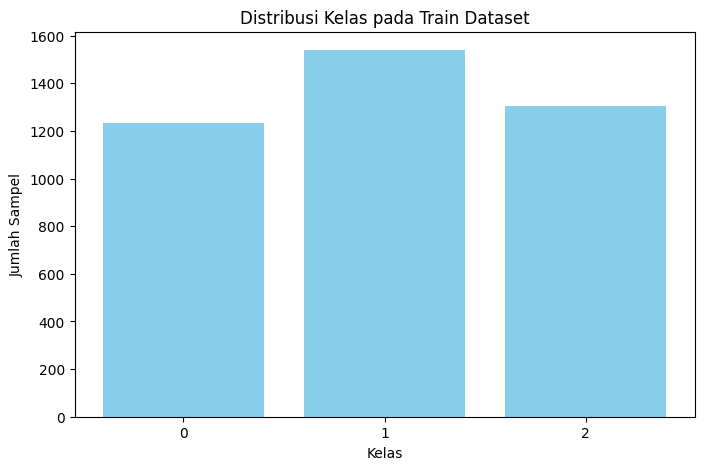


Distribusi kelas pada Validation Dataset:


,Kelas,Jumlah Sampel
2,0,137
0,1,172
1,2,145


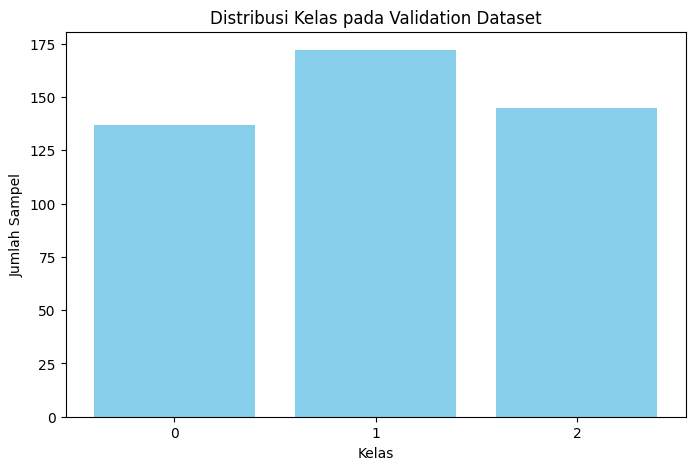


Distribusi kelas pada Test Dataset:


,Kelas,Jumlah Sampel
0,0,262
1,1,302
2,2,236


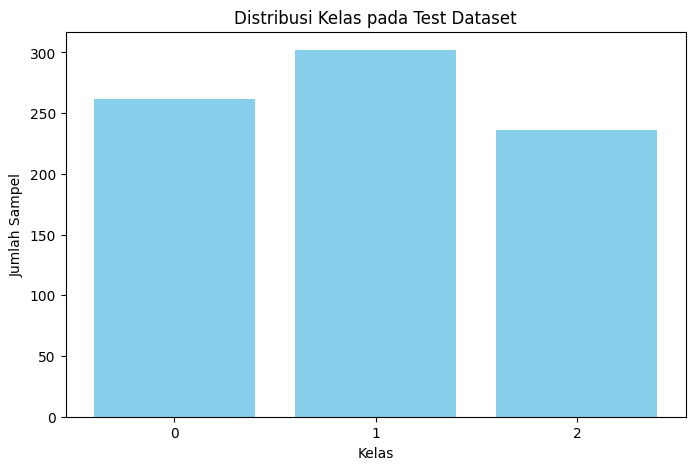

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan jumlah sampel per kelas dalam bentuk tabel dan grafik
def display_class_counts_with_visualization(dataset, dataset_name):
    # Hitung distribusi kelas
    class_counts = Counter(dataset["sentiment_label"])

    # Buat DataFrame untuk visualisasi tabel
    df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Kelas', 'Jumlah Sampel']).sort_values(by='Kelas')
    print(f"\nDistribusi kelas pada {dataset_name}:")
    display(df_class_counts)  # Menampilkan tabel

    # Visualisasi distribusi kelas
    plt.figure(figsize=(8, 5))
    plt.bar(df_class_counts['Kelas'], df_class_counts['Jumlah Sampel'], color='skyblue')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah Sampel')
    plt.title(f'Distribusi Kelas pada {dataset_name}')
    plt.xticks(df_class_counts['Kelas'])
    plt.show()

# Tampilkan distribusi kelas di train_dataset
display_class_counts_with_visualization(train_dataset, "Train Dataset")

# Tampilkan distribusi kelas di val_dataset
display_class_counts_with_visualization(val_dataset, "Validation Dataset")

# Tampilkan distribusi kelas di test_dataset
display_class_counts_with_visualization(test_dataset, "Test Dataset")


# **DISTRIBUSI KELAS DIRATAKAN**

In [ ]:
import pandas as pd
from sklearn.utils import resample
from collections import Counter

# Misalkan data Anda berada dalam DataFrame bernama `val_dataset` atau `test_dataset`
# Salin dataset untuk bekerja dengan salinan
val_df = pd.DataFrame(val_dataset)
test_df = pd.DataFrame(test_dataset)

def balance_classes(df, label_col):
    # Dapatkan jumlah sampel minimum di kelas minoritas
    min_samples = df[label_col].value_counts().min()

    # Resample untuk setiap kelas agar memiliki jumlah sampel yang sama
    balanced_df = pd.concat(
        [resample(df[df[label_col] == label], replace=False, n_samples=min_samples, random_state=42)
         for label in df[label_col].unique()]
    )

    # Tampilkan distribusi kelas setelah balancing
    print("Distribusi kelas setelah balancing:")
    print(balanced_df[label_col].value_counts())

    # Menampilkan baris per kelas
    print("\nJumlah sampel di setiap kelas:")
    for label in balanced_df[label_col].unique():
        class_count = balanced_df[balanced_df[label_col] == label].shape[0]
        print(f"Kelas {label}: {class_count} sampel")

    return balanced_df

# Menyeimbangkan kelas pada validation dan test dataset
balanced_val_df = balance_classes(val_df, 'sentiment_label')  # Gunakan nama kolom yang benar
balanced_test_df = balance_classes(test_df, 'sentiment_label')  # Gunakan nama kolom yang benar

# Mengganti val_dataset dan test_dataset dengan data yang sudah diseimbangkan
val_dataset = balanced_val_df
test_dataset = balanced_test_df


Distribusi kelas setelah balancing:
sentiment_label
1    137
2    137
0    137
Name: count, dtype: int64

Jumlah sampel di setiap kelas:
Kelas 1: 137 sampel
Kelas 2: 137 sampel
Kelas 0: 137 sampel
Distribusi kelas setelah balancing:
sentiment_label
0    236
1    236
2    236
Name: count, dtype: int64

Jumlah sampel di setiap kelas:
Kelas 0: 236 sampel
Kelas 1: 236 sampel
Kelas 2: 236 sampel


Batch shape: torch.Size([8, 1, 512])
- 8: batch size
- 1: sequence length (karena decoder_input_ids dengan size 1)
- 512: hidden size (dimensi representasi)

In [ ]:
!nvidia-smi


Mon Jan  6 09:13:13 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              46W / 400W |      5MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
print(val_dataset)

                                                Review  sentiment_label  \
216  terribl stori even wors act felt hollow pointl...                1   
368  plot drag begin stori predict write noth reall...                1   
405               agre review gave 1 tosh start finish                1   
170  yo ben give back 7 crapfest im done freak movi...                1   
424  melissa realli need step adlib game wasnt loug...                1   
..                                                 ...              ...   
239  honestli didnt realli like previou two movi be...                0   
363  call ballymena man japanes car flat tyre?lam n...                0   
42   ferri round entertain movi tell ferri bouman s...                0   
291  short sweet creativ violenc good blood gut cre...                0   
341  main actress play well alon worth watchingdial...                0   

     __index_level_0__                                          input_ids  \
216                531

CODINGAN DIBAWAH DIBACKUP DI NOTEPAD

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from transformers import Adafactor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Inisialisasi model MLP sebagai modul PyTorch (bukan dari sklearn untuk pelatihan bersama)
# class SimpleMLP(nn.Module):
#     def __init__(self, input_dim, output_dim, dropout_prob=0.5):
#         super(SimpleMLP, self).__init__()
#         self.hidden = nn.Linear(input_dim, 256)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(dropout_prob)  # Menambahkan dropout
#         self.output = nn.Linear(256, output_dim)

#     def forward(self, x):
#         x = self.hidden(x)
#         x = self.relu(x)
#         x = self.dropout(x)  # Terapkan dropout
#         x = self.output(x)
#         x = F.log_softmax(x, dim=1)  # Menggunakan log_softmax untuk NLLLoss
#         return x
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleMLP, self).__init__()
        self.hidden = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.output = nn.Linear(256, output_dim)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = F.log_softmax(x, dim=1)  # Menggunakan log_softmax untuk NLLLoss
        return x

# Tentukan dimensi hidden states dan jumlah kelas
# Untuk T5 kecil (t5-small), biasanya dimensi hidden states adalah 768
hidden_states_dim = 512  # Sesuaikan jika Anda menggunakan model T5 lain
num_classes = len(set(train_dataset["sentiment_label"]))  # Hitung jumlah kelas dari dataset

# Inisialisasi model MLP
mlp_model = SimpleMLP(input_dim=hidden_states_dim, output_dim=num_classes)
mlp_model.to(device)

# Optimizer gabungan untuk T5 dan MLP
# optimizer = optim.Adam(list(model.parameters()) + list(mlp_model.parameters()),lr=0.0005, weight_decay=1e-5)
optimizer = optim.AdamW(list(model.parameters()) + list(mlp_model.parameters()), lr=0.0001, weight_decay=1e-5)



# Pastikan model T5 dan MLP berada di perangkat yang benar
model.to(device)
mlp_model.to(device)

# Loop pelatihan
batch_size = 38
epochs = 10
for epoch in range(epochs):
    model.train()
    mlp_model.train()
    running_loss = 0.0
    num_batches = 0

    all_preds = []
    all_labels = []

    print(f"\n=== Epoch {epoch + 1}/{epochs} ===")

    for i in range(0, len(train_dataset), batch_size):
        # Dapatkan batch data
        end_idx = min(i + batch_size, len(train_dataset))
        batch_data = train_dataset.select(range(i, end_idx))

        # Tokenisasi input untuk T5
        inputs = tokenizer(batch_data["Review"], return_tensors="pt", padding=True, truncation=True, max_length=128)
        inputs = {key: val.to(device) for key, val in inputs.items()}

        # Labels sebagai tensor
        labels = torch.tensor(batch_data["sentiment_label"]).to(device)

        optimizer.zero_grad()

        # Menggunakan input_ids yang sama untuk decoder_input_ids
        decoder_input_ids = inputs["input_ids"]

        # Forward pass pada T5
        outputs = model(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            decoder_input_ids=decoder_input_ids,
            output_hidden_states=True
        )

        hidden_states = outputs.decoder_hidden_states[-1].mean(dim=1)

        # Forward pass pada MLP
        mlp_output = mlp_model(hidden_states)
        criterion = nn.NLLLoss()
        loss = criterion(mlp_output, labels)

        # Hitung loss dan backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        num_batches += 1

        # Simpan prediksi dan label
        preds = mlp_output.argmax(dim=1).detach().cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.detach().cpu().numpy())

        print(f"Epoch [{epoch + 1}/{epochs}] - Batch [{num_batches}/{len(train_dataset) // batch_size + 1}] - Loss: {loss.item():.4f}")

    # Hitung training accuracy
    train_accuracy = accuracy_score(all_labels, all_preds)
    print(f"Epoch [{epoch + 1}/{epochs}] - Average Loss: {running_loss / num_batches:.4f}")
    print(f"Epoch [{epoch + 1}/{epochs}] - Training Accuracy: {train_accuracy:.4f}")

    # Validation
    model.eval()
    mlp_model.eval()
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for i in range(0, len(val_dataset), batch_size):
            end_idx = min(i + batch_size, len(val_dataset))
            batch_data = val_dataset.iloc[i:end_idx] # INI UNTUK DISEIMBANGKAN
            # batch_data = val_dataset.select(range(i, end_idx)) #INI UNTUK TANPA DISEIMBANGKAN
            # Tokenisasi input untuk T5
            inputs = tokenizer(list(batch_data["Review"]), return_tensors="pt", padding=True, truncation=True, max_length=128)
            inputs = {key: val.to(device) for key, val in inputs.items()}

            # Labels sebagai tensor
            labels = torch.tensor(batch_data["sentiment_label"].values).to(device)# INI UNTUK DISEIMBANGKAN
            # labels = torch.tensor(batch_data["sentiment_label"]).to(device) #INI UNTUK TANPA DISEIMBANGKAN


            # Forward pass pada T5
            outputs = model(
                input_ids=inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                decoder_input_ids=inputs["input_ids"],
                output_hidden_states=True
            )

            hidden_states = outputs.decoder_hidden_states[-1].mean(dim=1)

            # Forward pass pada MLP
            mlp_output = mlp_model(hidden_states)
            preds = mlp_output.argmax(dim=1).detach().cpu().numpy()

            val_preds.extend(preds)
            val_labels.extend(labels.detach().cpu().numpy())

    # Hitung validation accuracy
    val_accuracy = accuracy_score(val_labels, val_preds)
    print(f"Epoch [{epoch + 1}/{epochs}] - Validation Accuracy: {val_accuracy:.4f}")




=== Epoch 1/10 ===


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch [1/10] - Batch [1/108] - Loss: 1.0930
Epoch [1/10] - Batch [2/108] - Loss: 1.1089
Epoch [1/10] - Batch [3/108] - Loss: 1.0892
Epoch [1/10] - Batch [4/108] - Loss: 1.0912
Epoch [1/10] - Batch [5/108] - Loss: 1.0959
Epoch [1/10] - Batch [6/108] - Loss: 1.0937
Epoch [1/10] - Batch [7/108] - Loss: 1.0937
Epoch [1/10] - Batch [8/108] - Loss: 1.1000
Epoch [1/10] - Batch [9/108] - Loss: 1.0926
Epoch [1/10] - Batch [10/108] - Loss: 1.0816
Epoch [1/10] - Batch [11/108] - Loss: 1.0845
Epoch [1/10] - Batch [12/108] - Loss: 1.0849
Epoch [1/10] - Batch [13/108] - Loss: 1.1132
Epoch [1/10] - Batch [14/108] - Loss: 1.0930
Epoch [1/10] - Batch [15/108] - Loss: 1.0870
Epoch [1/10] - Batch [16/108] - Loss: 1.0758
Epoch [1/10] - Batch [17/108] - Loss: 1.0841
Epoch [1/10] - Batch [18/108] - Loss: 1.1178
Epoch [1/10] - Batch [19/108] - Loss: 1.0799
Epoch [1/10] - Batch [20/108] - Loss: 1.0743
Epoch [1/10] - Batch [21/108] - Loss: 1.0905
Epoch [1/10] - Batch [22/108] - Loss: 1.0966
Epoch [1/10] - Batc

# **Multi layer perceptron**

In [ ]:
# print(outputs.shape)
print("Type of labels:", type(labels))  # Ini harus menunjukkan <class 'torch.Tensor'>
print("Shape of outputs:", outputs.logits.shape)  # Ini untuk memeriksa output dari model
# print("Shape of labels_tokenized:", labels_tokenized.shape)
print(labels.shape)
print("decoder hidden state",outputs.decoder_hidden_states[-1].mean(dim=1).shape)
print(mlp_output.shape)
# print(outputs.decoder_hidden_states.shape)

Type of labels: <class 'torch.Tensor'>
Shape of outputs: torch.Size([31, 128, 32128])
torch.Size([31])
decoder hidden state torch.Size([31, 512])
torch.Size([31, 3])


# **INI MLP YANG MELAKUKAN EVALUASI**

In [ ]:
df_test

,AUTHOR,TITLE,review,rating,sentiment_label,Review
3,kuarinofu,Bare-bones killer shark film\n,Great White is as basic of a killer shark film...,4,0,great white basic killer shark film possibl ev...
4,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n","Terrible story, dialogue and CGI. The film has...",4,0,terribl stori dialogu cgi film predict outcom ...
5,NickyDee07938,A decent effort\n,Whilst the 'shark survival' sub genre has plen...,6,0,whilst shark surviv sub genr plenti contributo...
9,rotini-52586,Liked it !\n,Thought it was a great Shark Movie . Special e...,7,0,thought great shark movi special effect decent...
16,gsyfrafjrp,Waste of time and money!\n,"Totally waste of time and money, worst movie t...",1,1,total wast time money worst movi start summer
...,...,...,...,...,...,...
5431,aminussh,"Incredible, far better than previous cut\n",Zack snyder's justice league is far better tha...,9,2,zack snyder justic leagu far better theatric c...
5432,delpierokavinda,Great art\n,"The story of ""Man of Steel"" and ""Batman vs. Su...",10,2,stori man steel batman vs superman continu mov...
5440,cjosty,RESTORE THE SNYDER VERSE\n,Zack Snyder's Justice League is an EPIC in eve...,10,2,zack snyder justic leagu epic everi sens word ...
5442,Pyro_Pizza,"Long, but worth it.\n",Zack Snyder's Justice league is an excellent m...,8,2,zack snyder justic leagu excel movi howev 4 ho...


In [ ]:
import torch
print(torch.cuda.memory_summary())


|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   2679 MiB |   6950 MiB |  16611 GiB |  16609 GiB |
|       from large pool |   2389 MiB |   6731 MiB |  16435 GiB |  16432 GiB |
|       from small pool |    290 MiB |    363 MiB |    176 GiB |    176 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   2679 MiB |   6950 MiB |  16611 GiB |  16609 GiB |
|       from large pool |   2389 MiB |   6731 MiB |  16435 GiB |

              precision    recall  f1-score   support

           0       0.66      0.39      0.49       236
           1       0.71      0.86      0.78       236
           2       0.69      0.83      0.75       236

    accuracy                           0.69       708
   macro avg       0.69      0.69      0.67       708
weighted avg       0.69      0.69      0.67       708



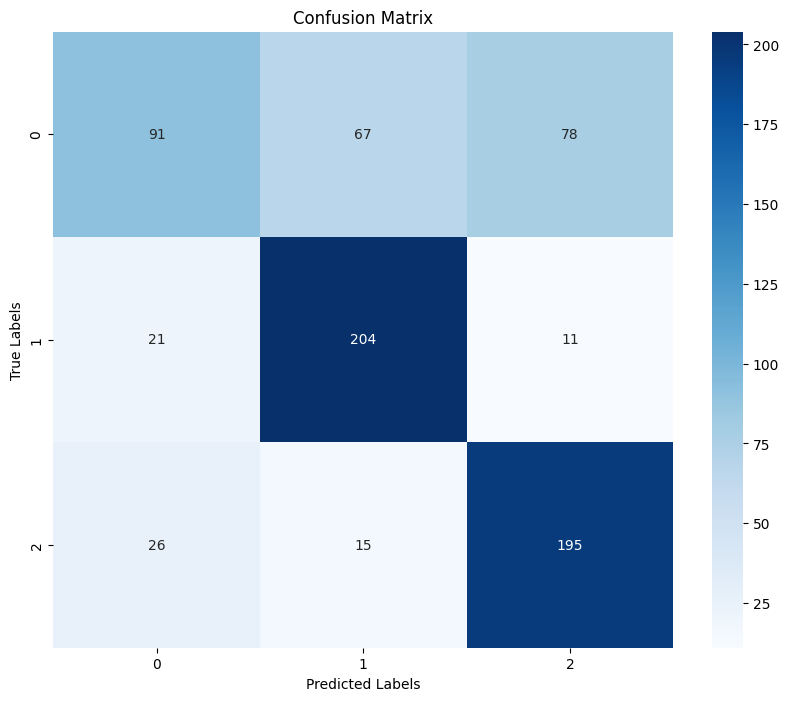

In [ ]:
import numpy as np
import torch
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mode evaluasi pada model T5 dan MLP
model.eval()  # T5 model
mlp_model.eval()  # MLP model

# Step 1: Proses dataset testing melalui T5 untuk mendapatkan hidden states
test_reviews = test_dataset["review"]  # Ambil teks review dari dataset
test_hidden_states_combined = []  # List untuk menyimpan hidden states dari setiap review

with torch.no_grad():
    for review in test_reviews:
        # Tokenisasi input
        inputs = tokenizer(review, return_tensors="pt", truncation=True, max_length=128).to(device)

        # Dapatkan hidden states dari T5
        outputs = model(**inputs, decoder_input_ids=inputs["input_ids"])

        decoder_hidden_state = outputs.decoder_hidden_states[-1].mean(dim=1)  # Ambil hidden state terakhir, lalu rata-rata

        test_hidden_states_combined.append(decoder_hidden_state.cpu().numpy())  # Simpan ke list

# Ubah ke array numpy dan konversi ke tensor PyTorch
test_hidden_states_combined = np.concatenate(test_hidden_states_combined, axis=0)  # Bentuk: (jumlah_data, fitur)
test_hidden_states_combined = torch.tensor(test_hidden_states_combined, dtype=torch.float32).to(device)

# Step 2: Prediksi kelas dengan MLP (gunakan forward pass di PyTorch)
with torch.no_grad():
    test_outputs = mlp_model(test_hidden_states_combined)  # Forward pass pada MLP
    test_predictions = torch.argmax(test_outputs, dim=1).cpu().numpy()  # Mengambil prediksi kelas dengan argmax

# Step 3: Evaluasi hasil prediksi
test_labels = test_dataset["sentiment_label"]
print(classification_report(test_labels, test_predictions, target_names=[str(i) for i in range(3)], zero_division=1))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(3)], yticklabels=[str(i) for i in range(3)])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
       # Ambil hidden state terakhir dan lakukan agregasi dengan max
        # decoder_hidden_state = outputs.decoder_hidden_states[-1]
        # last_hidden_states = torch.max(decoder_hidden_state, dim=1).values

In [ ]:
from collections import Counter

# Langkah 3: Evaluasi hasil prediksi
test_labels = test_dataset["sentiment_label"]

# Cetak review dan kelas yang diprediksi
for review, prediction in zip(test_reviews, test_predictions):
    print(f"Review: {review}\nPredicted Class: {prediction}\n")

# Hitung distribusi kelas yang diprediksi
predicted_class_counts = Counter(test_predictions)

# Tampilkan jumlah prediksi per kelas
print("\nDistribusi kelas prediksi:")
for cls, count in predicted_class_counts.items():
    print(f"Kelas {cls}: {count} sampel")

Review: Damn it was just fun. The plot just works it had no intention of being meaningful but it explains most of the craziness with some sort f believable excuse. 0.5/2. The plot setting was right 1/1.The directing and cinematography were not incredible but they were clever enough in showing minor details which ties up the loose ends very well. I especially enjoyed Nicholas Cage taking a break from time to time as instructed.
It is just funny how his character is a master cleaner. This was definitely included to make it more funny and it worked. And the monsters well, they were just play things for the mighty Nic Cage. 1.5/2 for cinematography and directing.The acting slides down a notch but they were very serious making it all the more comic. 0.5/2. Personally it was a worthwhile watch so 1.5/2.
Predicted Class: 0

Review: I.have read the 3 books and they are really best then the movie.
Predicted Class: 1

Review: Hopkins make it intresting
The end is predictable
Its a fun movie anyw

In [ ]:
from google.colab import runtime
runtime.unassign()